In [1]:
import SequenceGen as seqgen
import spikeship.spikeship as spikeship
import numpy as np
import matplotlib.pyplot as plt

C:\Users\tomha\anaconda3\envs\BSC\lib\site-packages\numba\core\decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
C:\Users\tomha\OneDrive\Bureaublad\BSC Thesis\Analysis\spikeship\spikeship.py:254: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(int32(int32, int32))


In [2]:
from scipy.stats import ttest_ind

In [3]:
def convert_spike_timing(spikes_neuron_trial):
    nr_trials = spikes_neuron_trial.shape[0]
    nr_neurons = spikes_neuron_trial.shape[1]
    ii_spike_times = np.empty((nr_trials, nr_neurons, 2))
    spike_times = []
    idx = 0
    for trial in range(nr_trials):
        for channel in range(nr_neurons):
            spikes = spikes_neuron_trial[trial, channel]
            spike_times.extend(spikes)
            ii_spike_times[trial, channel, 0] = idx
            idx += len(spikes)
            ii_spike_times[trial, channel, 1] = idx
    spike_times = np.array(spike_times)
    return spike_times, ii_spike_times

In [4]:
l1 = []
for i in range(1000):
    data1, seq1 = seqgen.simulate_trials(100, 50, 0.1, 0.04, mean_delay=0.03, delay_var=0.01, avg_FR=10, FR_var=0, jitter=0.01, has_sequence=False)
    data2, seq2 = seqgen.simulate_trials(100, 50, 0.1, 0.04, mean_delay=0.03, delay_var=0.01, avg_FR=10, FR_var=0, jitter=0.01, has_sequence=False)
    spike_times1, ii_spike_times1 = convert_spike_timing(data1)
    spike_times2, ii_spike_times2 = convert_spike_timing(data2)
    spikeship_matrix1 = spikeship.distances(spike_times1, ii_spike_times1)
    spikeship_matrix2 = spikeship.distances(spike_times2, ii_spike_times2)
    stat1 = spikeship_matrix1[spikeship_matrix1 != 0].flatten()
    stat2 = spikeship_matrix2[spikeship_matrix2 != 0].flatten()
    res = ttest_ind(stat1, stat2, alternative='less')
    l1.append(res.pvalue)

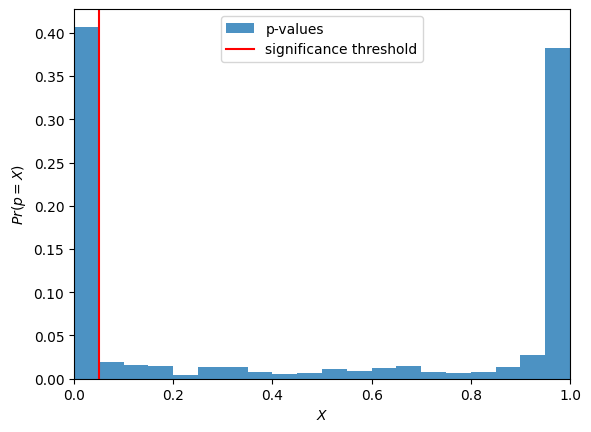

In [5]:
plt.figure()
weights = np.ones(len(l1)) / len(l1)
plt.hist(l1, bins=20, alpha=0.8, weights=weights, label="p-values")
plt.xlim(0, 1)
plt.xlabel("$X$")
plt.ylabel("$Pr(p = X)$")
plt.axvline(0.05, color='r', label="significance threshold")
plt.legend()
plt.show()

In [6]:
FP = len([1 for e in l1 if e < 0.05]) / len(l1)
print(FP)

0.407


In [ ]:
data, seq = seqgen.simulate_trials(100, 50, 4, 2, mean_delay=1, delay_var=0.1, avg_FR=5, has_sequence=False)

In [10]:
spike_times, ii_spike_times = convert_spike_timing(data)

In [11]:
spikeship_matrix = spikeship.distances(spike_times, ii_spike_times)

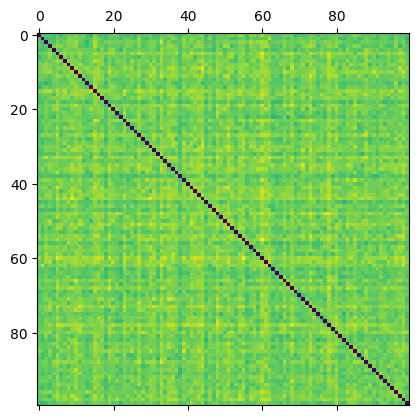

In [12]:
plt.matshow(spikeship_matrix)